In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal

%matplotlib inline

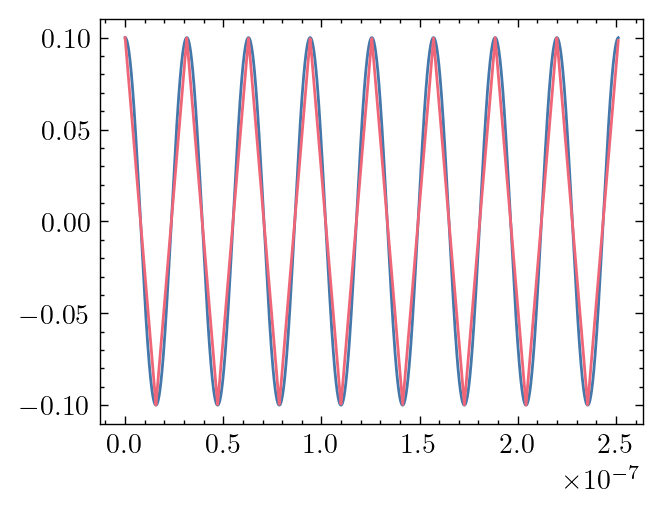

In [98]:
amplitude   = 0.1
freq        = 2.0
time_step   = 1e-10
N_periods   = 16
N_voltages  = int(N_periods*np.pi/(freq*1e8*time_step))
time_steps  = time_step*np.arange(N_voltages)
x_vals      = amplitude*np.cos(freq*time_steps*1e8)
y_target    = amplitude*signal.sawtooth(freq*time_steps*1e8-np.pi, 0.5)
x_scaled    = (x_vals-np.mean(x_vals))/np.std(x_vals)
y_scaled    = (y_target-np.mean(y_target))/np.std(y_target)

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    ax.plot(time_steps, x_vals)
    ax.plot(time_steps, y_target)

In [110]:
folder  = "../data/sine_to_triangle/"
N_vals  = 8
data    = pd.DataFrame([np.loadtxt(f"{folder}ypred_{i}.csv") for i in range(1,N_vals+1)]).T
data    = data.replace(0, np.nan).dropna(ignore_index=True)
loss    = np.sqrt(np.mean((data.values - y_scaled[1:,np.newaxis])**2, axis=0))

c_map = plt.get_cmap('Reds')

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*1.5)
    ax  = fig.add_subplot(2,1,1)
    ax.plot(time_steps*1e9, x_scaled, label="input")
    
    for i, col in enumerate(data.columns):
        ax.plot(time_steps[1:]*1e9, data[col], c=c_map((i+1)/N_vals))

    ax.plot(time_steps*1e9, y_scaled, c='black', label='target')
    ax.set_xlabel("$t$ [ns]")
    ax.legend(fontsize='small', loc='lower left')

    ax  = fig.add_subplot(2,1,2)
    ax.plot(loss, 'o-')
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MSE")

ValueError: operands could not be broadcast together with shapes (0,8) (2512,1) 

In [102]:
np.exp(1)

np.float64(2.718281828459045)

In [76]:
np.sqrt(np.mean((data.values - y_scaled[1:,np.newaxis])**2, axis=0))

array([0.88466111, 0.7741777 , 0.71208385, 0.65241926, 0.59472555,
       0.55064145])

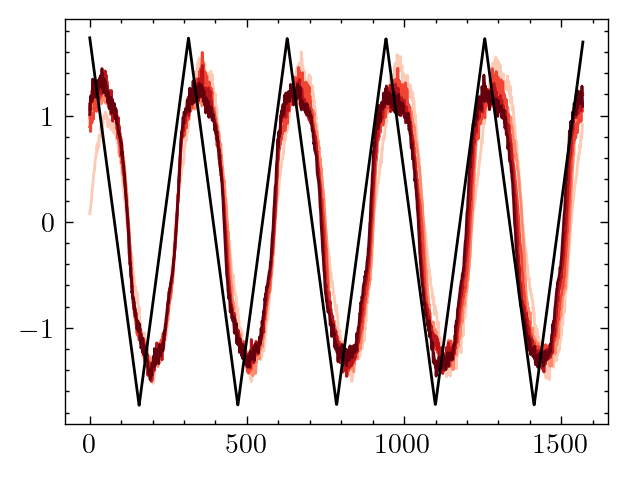

In [48]:
c_map = plt.get_cmap('Reds')

with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot()
    for i, col in enumerate(data.columns):
        ax.plot(data[col], c=c_map((i+1)/N_vals))

    ax.plot((y_target-np.mean(y_target))/np.std(y_target), c='black')